In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

### Sigmoid function

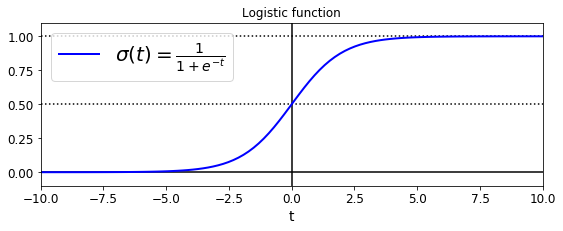

In [6]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
# line
plt.plot([-10, 10], [0, 0], 'k-')
# dotted line
plt.plot([-10, 10], [0.5, 0.5], 'k:')
plt.plot([-10, 10], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', linewidth=2, label=r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
plt.xlabel('t')
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.title("Logistic function")
plt.show()

### load iris dataset

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [9]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [24]:
# trainig with petal width
X = iris['data'][:, 3:]
# convert all the class-2 to 1, other 
# classes to 0
y = (iris['target'] == 2).astype(np.int)

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Test data

In [29]:
# create test data
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
# show the probabilities 
y_proba = log_reg.predict_proba(X_new)

In [32]:
# y_proba.shape: [1000, 2], since there
# are two probabilities, prob for False and 
# prob for True
y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

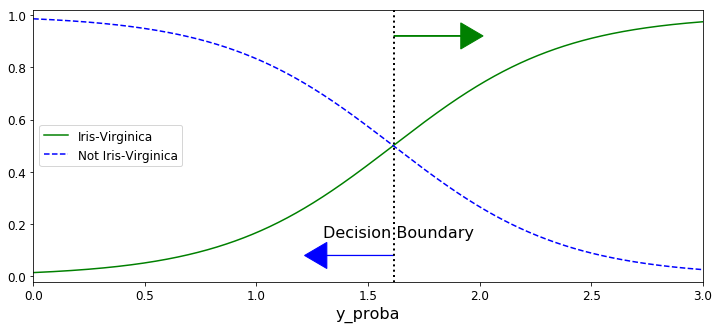

In [49]:
plt.figure(figsize=(12, 5))
decision_boundary = X_new[y_proba[:, 1]>=0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:', linewidth=2)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.1, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.1, head_length=0.1, fc='g', ec='g')
plt.text(decision_boundary + 0.02, 0.15, 'Decision Boundary', fontsize=16, color='k', ha='center')
plt.xlabel('Petal width(cm)', fontsize=16)
plt.xlabel('y_proba', fontsize=16)
plt.axis([0, 3, -0.02, 1.02])
plt.legend(loc='center left', fontsize=12)

In [51]:
# print(help(plt.arrow))

### Decision Boundary

In [55]:
X = iris['data'][:, (2, 3)]
y = (iris['target']==2).astype(np.int)

In [112]:
from sklearn.linear_model import LogisticRegression
# C : regularization, the bigger C is , the less regularization it does
log_reg = LogisticRegression(C=10000)
log_reg.fit(X, y)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

build coordinate data

In [113]:
X[:,0].min(), X[:, 0].max()

(1.0, 6.9)

In [114]:
X[:, 1].min(), X[:, 1].max()

(0.1, 2.5)

In [115]:
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1), np.linspace(0.8, 2.7, 200).reshape(-1, 1))

In [116]:
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new.shape

(100000, 2)

In [117]:
# y_proba.shape: (10000, 2)
y_proba = log_reg.predict_proba(X_new)

Text(6.5, 2.3, 'Vir')

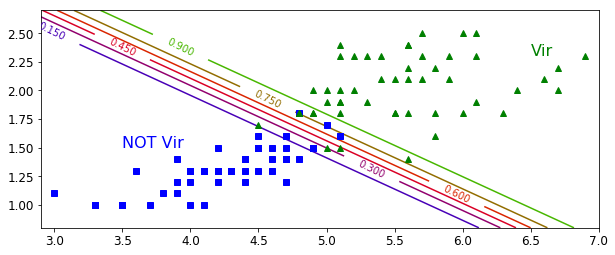

In [121]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0,0], X[y==0,1], 'bs')
plt.plot(X[y==1,0], X[y==1,1], 'g^')

# x0.shape: (200,500), x1.shape: (200,500)
# (10000, 2) -> (200, 500)
zz = y_proba[:,1].reshape(x0.shape)
# contour line
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.axis([2.9, 7, 0.8, 2.7])
plt.text(3.5, 1.5, 'NOT Vir', fontsize=16, color='b')
plt.text(6.5, 2.3, 'Vir', fontsize=16, color='g')

### Softmax

In [123]:
X = iris['data'][:, (2, 3)]
y = iris['target']

In [126]:
# softmax 的套路， 比如说要指定mutli_class，一定要指定solver，solver有好几种，
# 请看文档，懒得看就用这里的lbfgs
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
# outputs 3 probabilities
softmax_reg.predict_proba([[5, 2]])

array([[2.43559894e-04, 2.14859516e-01, 7.84896924e-01]])